In [3]:
%pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 43.2 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
from datetime import datetime as dt

In [4]:
finland_disturbances=pd.read_html('https://www.traficom.fi/en/news/situational-picture-disturbances-satellite-navigation-finland-2024')

In [12]:
finland_disturbances[0].to_csv('finland_disturbance.csv',index=False)

In [38]:
fi_data

,Year,Finland,Finnish operators’ notifications outside of Finland
0,2018,0,6
1,2019,8,137
2,2020,27,34
3,2021,8,71
4,2022,65,1331
5,2023,239,7370
6,2024 (by 30 April),Around 1200,Around 2100


In [16]:
fi_data=pd.read_csv('finland_disturbance.csv',header=1)

array([<Axes: xlabel='clean_year'>, <Axes: xlabel='clean_year'>],
      dtype=object)

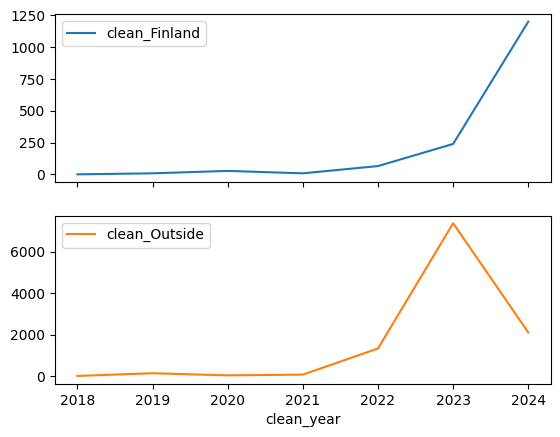

In [64]:
(fi_data
 .assign(
     clean_year=fi_data.Year.str.split(' ',expand=True)[0],
     clean_Finland=fi_data.Finland.str.replace('Around ','').astype('int32'),
     clean_Outside=fi_data['Finnish operators’ notifications outside of Finland'].str.replace('Around ','').astype('int32')
 )
 .set_index('clean_year')
 .plot(subplots=True)
)

In [39]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')
table_list[0].to_csv('gps_navcen.csv',index=False)

In [61]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')

In [63]:
gps_disruption_df[gps_disruption_df.Location.str.lower().fillna('').str.contains('finland') | gps_disruption_df.Description.str.lower().fillna('').str.contains('finland')]#.fillna(False)]

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date
353,08/30/2019 08:23 GMT,"Aarhus, Denmark",Timing,We observe pps (pulse per second)outages on se...,User Equipment,09/11/2019
405,04/05/2019 03:00 CET,"Oulu, Finland",Communications,User: GPS Week Number Rollover expected on Apr...,User Equipment,06/03/2019
509,08/01/2017 00:00 EEST,"Helsinki, Finland",Other,User: GPS lack about every 10-20 sec and not g...,Unknown Interference,05/20/2019
